## **Descarga de Bases**

In [1]:
from google.colab import drive

# Montamos nuestra unidad drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Nos dirigimos a la carpeta con los inputs
# %cd /content/drive/MyDrive/TA_TAC/FINAL
%cd /content/drive/MyDrive/TA
# %cd /content/drive/My\ Drive/2021-1/TAC/TA

/content/drive/.shortcut-targets-by-id/1E6FH8qATLyjIcq0TwQVxmCJ1SdpR4yZr/TA


In [4]:
%ls -l

total 1622
-r-------- 1 root root 1118547 Jun 30 00:17 'Copia de TA Final Preprocesamiento.ipynb'
dr-x------ 2 root root    4096 Jun 29 17:04  data/
-r-------- 1 root root  453015 Jun 30 19:45 'TA Final Preprocesamiento.ipynb'
-r-------- 1 root root   84769 Jun 30 19:44  test.png


### **Imports**

In [5]:
import os
from matplotlib import image
from shutil import copyfile
import cv2
import seaborn as sns
import random

import PIL
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [6]:
%tensorflow_version 2.x
from tensorflow.keras import backend as K
import tensorflow as tf

tf.random.set_seed(0)

## **Lectura de imágenes**

In [7]:
# Creamos una carpeta para descomprimir las imagenes
#!mkdir data
# !cd data && unzip BSDS300-images.zip

# Si la carpeta ya esta creada, nos dirigimos a esta
%cd data/

/content/drive/.shortcut-targets-by-id/1E6FH8qATLyjIcq0TwQVxmCJ1SdpR4yZr/TA/data


In [8]:
# !unzip BSDS300-images.zip

Archive:  BSDS300-images.zip
replace BSDS300/iids_train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
%ls -l

total 21716
dr-x------ 3 root root     4096 Jun 29 17:54 BSDS300/
-r-------- 1 root root 22232571 Jun 29 17:19 BSDS300-images.zip


In [10]:
# srcPath = '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images'
srcPath = 'BSDS300/images'

train_scan_paths = os.listdir(srcPath + '/train')
test_scan_paths = os.listdir(srcPath + '/test')

train_scan_paths = [(srcPath + '/train/' + x) for x in train_scan_paths]
test_scan_paths = [(srcPath + '/test/' + x) for x in test_scan_paths]


print("train scan with length of: {}".format(len(train_scan_paths)))
print("test scan with length of: {}".format(len(test_scan_paths)))

train scan with length of: 200
test scan with length of: 100


In [11]:
train_scan_paths[:5]

['BSDS300/images/train/365025.jpg',
 'BSDS300/images/train/20008.jpg',
 'BSDS300/images/train/232038.jpg',
 'BSDS300/images/train/188091.jpg',
 'BSDS300/images/train/286092.jpg']

In [12]:
test_scan_paths[:5]

['BSDS300/images/test/170057.jpg',
 'BSDS300/images/test/163085.jpg',
 'BSDS300/images/test/220075.jpg',
 'BSDS300/images/test/167062.jpg',
 'BSDS300/images/test/43074.jpg']

## **Preprocesamiento**

In [13]:
def normalize_scan(image):
  
  norm_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  return norm_image

def resize_scan(scan, desired_width, desired_height):
  
  scan = cv2.resize(scan, (desired_height, desired_width))
  return scan

def preprocess_scan(path, width, height):
  
  scan = image.imread(path)
  resized_scan = resize_scan(scan, width, height)
  normalized_resized_scan = normalize_scan(resized_scan)

  return resized_scan


In [14]:
width = 256
height = 256

In [16]:
train_scans = [preprocess_scan(path, width, height) for path in train_scan_paths]
test_scans = [preprocess_scan(path, width, height) for path in test_scan_paths]

In [17]:
train_scans[0].shape

(256, 256, 3)

(-0.5, 255.5, 255.5, -0.5)

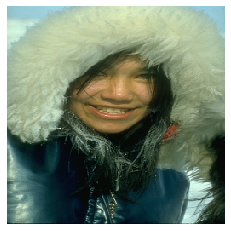

In [18]:
data = train_scans[0]
img = plt.imshow(data, interpolation='nearest')
img.set_cmap('hot')
plt.axis('off')
# plt.savefig("test.png", bbox_inches='tight')

In [19]:
data = train_scans[0]

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

noise_img = sp_noise(data,0.05)

(-0.5, 255.5, 255.5, -0.5)

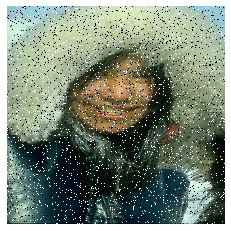

In [20]:
img = plt.imshow(noise_img, interpolation='nearest')
img.set_cmap('hot')
plt.axis('off')
# plt.savefig("test.png", bbox_inches='tight')

In [21]:
data = train_scans[1]

def gauss_noise(image):
      row,col,ch= image.shape
      mean = 0
      var = 10
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy

gauss_img = gauss_noise(data)

In [34]:
def gauss_noise_2(image, std):
  noise = np.random.normal(0, std, (image.shape[0], image.shape[1], 1))

  noise_img = np.array(image) + noise

  noise_img = np.clip(noise_img, 0, 255).astype(np.uint8)
  return noise_img

In [35]:
gauss_img_2 = gauss_noise_2(data, 10)

(-0.5, 255.5, 255.5, -0.5)

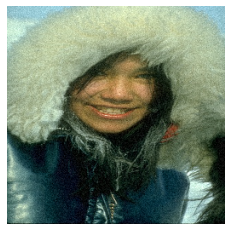

In [36]:
img = plt.imshow(gauss_img_2)
img.set_cmap('hot')
plt.axis('off')
# plt.savefig("test.png", bbox_inches='tight')

In [25]:
def poisson_noise(img):
  noise_mask = np.random.poisson(img)

  noisy_img = img + noise_mask
  return noisy_img

data = train_scans[0]
noisy_img = poisson_noise(data)

(-0.5, 255.5, 255.5, -0.5)

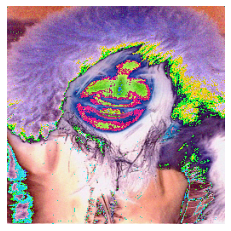

In [26]:
img = plt.imshow((noisy_img * 255).astype(np.uint8))
img.set_cmap('hot')
plt.axis('off')
# plt.savefig("test.png", bbox_inches='tight')

## **Ruido Gaussiano - Dataset Imagenes**
Procedemos a realizar la experimentación usando ruido Gaussiano

In [37]:
train_gaussian_noise_images = [gauss_noise_2(x, 10) for x in train_scans]
test_gaussian_noise_images = [gauss_noise_2(x, 10) for x in test_scans]

In [38]:
N_CHANNELS = 3

In [39]:
train_gaussian_noise_images = np.array(train_gaussian_noise_images).reshape((-1, width, height, N_CHANNELS)).astype(np.float32)
test_gaussian_noise_images = np.array(test_gaussian_noise_images).reshape((-1, width, height, N_CHANNELS)).astype(np.float32)

In [40]:
train_target_images = np.array(train_scans).astype(np.float32)
test_target_images = np.array(test_scans).astype(np.float32)

In [41]:
# Funcion de perdida - MSE
from tensorflow.keras.losses import MeanSquaredError

mse = tf.keras.losses.MeanSquaredError()
mse(train_gaussian_noise_images[0], train_scans[0].astype(np.float32)).numpy()

96.12849

In [43]:
# Tamaño del BATCH
BATCH_SIZE = 20

# Tamaño del train
train_gaussian_noise_images.shape[0]

# Numero de EPOCAS
EPOCHS = 20
print("Numero de epocas: {}".format(EPOCHS))

Numero de epocas: 20


## **MODELAMIENTO**
Código adaptado de Tensorflow 1.0 a 2.0 de https://github.com/NVlabs/noise2noise/

In [44]:
from keras import Input, Model
from keras import layers

In [45]:
from keras import backend as K
K.clear_session()

In [46]:
def Autoencoder():
  
  input_img = Input(shape=(256, 256, 3))  

  # ============================================================================
  # == ENCODER
  # ============================================================================

  conv_1_a = layers.Conv2D(48, (3, 3), padding='same', use_bias=True)(input_img)
  l_relu_1_a = layers.LeakyReLU()(conv_1_a)
  conv_1_b = layers.Conv2D(48, (3, 3), padding='same', use_bias=True)(l_relu_1_a)
  l_relu_1_b = layers.LeakyReLU()(conv_1_b)
  maxpool_1 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_1_b)
  #print(maxpool_1.shape)

  conv_2 = layers.Conv2D(48, (3, 3), padding='same', use_bias=True)(maxpool_1)
  l_relu_2 = layers.LeakyReLU()(conv_2)
  maxpool_2 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_2)
  #print(maxpool_2.shape)

  conv_3 = layers.Conv2D(48, (3, 3), padding='same', use_bias=True)(maxpool_2)
  l_relu_3 = layers.LeakyReLU()(conv_3)
  maxpool_3 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_3)
  #print(maxpool_3.shape)

  conv_4 = layers.Conv2D(48, (3, 3), padding='same', use_bias=True)(maxpool_3)
  l_relu_4 = layers.LeakyReLU()(conv_4)
  maxpool_4 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_4)
  #print(maxpool_4.shape)

  conv_5_a = layers.Conv2D(48, (3, 3), padding='same', use_bias=True)(maxpool_4)
  l_relu_5_a = layers.LeakyReLU()(conv_5_a)
  maxpool_5 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_5_a)
  #print(maxpool_5.shape)

  conv_5_b = layers.Conv2D(48, (3, 3), padding='same', use_bias=True)(maxpool_5)
  encoded = layers.LeakyReLU()(conv_5_b)

  # ============================================================================
  # == DECODER
  # ============================================================================

  upsamp_6 = layers.UpSampling2D((2, 2))(encoded)
  #print(upsamp_6.shape)
  concat_6 = tf.concat([upsamp_6, maxpool_4], axis=3)
  #print(concat_6.shape)
  conv_6_a = layers.Conv2D(96, (3, 3), padding='same', use_bias=True)(concat_6)
  l_relu_6_a = layers.LeakyReLU()(conv_6_a)
  conv_6_b = layers.Conv2D(96, (3, 3), padding='same', use_bias=True)(l_relu_6_a)
  l_relu_6_b = layers.LeakyReLU()(conv_6_b)
  
  upsamp_7 = layers.UpSampling2D((2, 2))(l_relu_6_b)
  #print(upsamp_7.shape)
  concat_7 = tf.concat([upsamp_7, maxpool_3], axis=3)
  #print(concat_7.shape)
  conv_7_a = layers.Conv2D(96, (3, 3), padding='same', use_bias=True)(concat_7)
  l_relu_7_a = layers.LeakyReLU()(conv_7_a)
  conv_7_b = layers.Conv2D(96, (3, 3), padding='same', use_bias=True)(l_relu_7_a)
  l_relu_7_b = layers.LeakyReLU()(conv_7_b)

  upsamp_8 = layers.UpSampling2D((2, 2))(l_relu_7_b)
  #print(upsamp_8.shape)
  concat_8 = tf.concat([upsamp_8, maxpool_2], axis=3)
  #print(concat_8.shape)
  conv_8_a = layers.Conv2D(96, (3, 3), padding='same', use_bias=True)(concat_8)
  l_relu_8_a = layers.LeakyReLU()(conv_8_a)
  conv_8_b = layers.Conv2D(96, (3, 3), padding='same', use_bias=True)(l_relu_8_a)
  l_relu_8_b = layers.LeakyReLU()(conv_8_b)

  upsamp_9 = layers.UpSampling2D((2, 2))(l_relu_8_b)
  #print(upsamp_9.shape)
  concat_9 = tf.concat([upsamp_9, maxpool_1], axis=3)
  #print(concat_9.shape)
  conv_9_a = layers.Conv2D(96, (3, 3), padding='same', use_bias=True)(concat_9)
  l_relu_9_a = layers.LeakyReLU()(conv_9_a)
  conv_9_b = layers.Conv2D(96, (3, 3), padding='same', use_bias=True)(l_relu_9_a)
  l_relu_9_b = layers.LeakyReLU()(conv_9_b)

  upsamp_10 = layers.UpSampling2D((2, 2))(l_relu_9_b)
  #print(upsamp_10.shape)
  concat_10 = tf.concat([upsamp_10, input_img], axis=3)
  #print(concat_10.shape)
  conv_10_a = layers.Conv2D(64, (3, 3), padding='same', use_bias=True)(concat_10)
  l_relu_10_a = layers.LeakyReLU()(conv_10_a)
  conv_10_b = layers.Conv2D(32, (3, 3), padding='same', use_bias=True)(l_relu_10_a)
  l_relu_10_b = layers.LeakyReLU()(conv_10_b)

  decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(l_relu_10_b)
  #print(decoded.shape)
  # decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(l_relu_7_b)

  return Model(input_img, decoded)

In [47]:
autoencoder = Autoencoder()

In [ ]:
# %cd /content/drive/My Drive/TA_02_TAC
# %ls -l

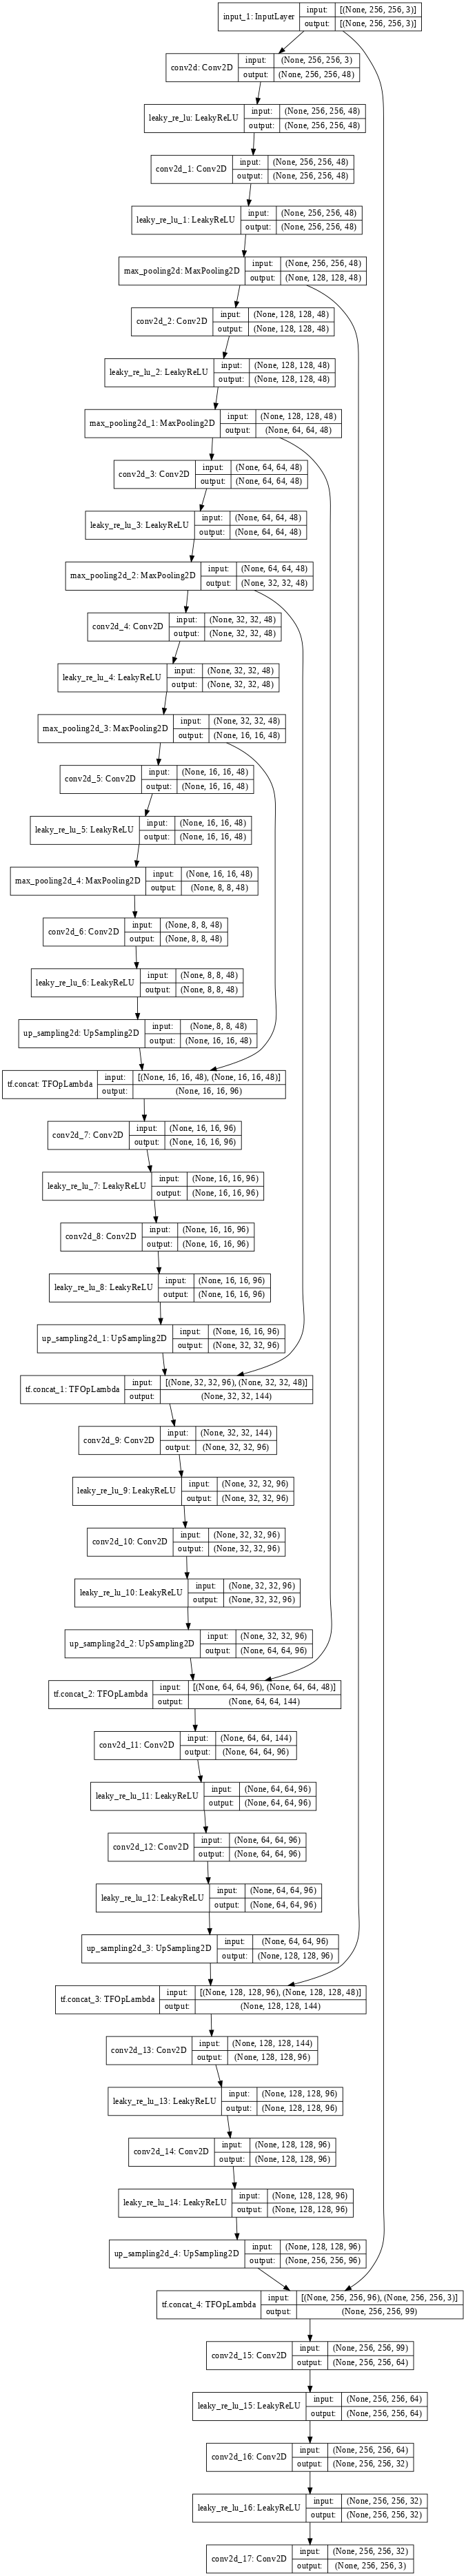

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, show_shapes=True, dpi=64)

In [51]:
from tensorflow.keras.optimizers import Adam

# Definimos la funcion de optimizacion
autoencoder_optimizer = Adam(0.001, beta_1=0.9)

In [52]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=autoencoder_optimizer,
                                 autoencoder=autoencoder)

## **Training**
Código adaptado de https://www.tensorflow.org/tutorials/generative/pix2pix

In [53]:
from datetime import datetime
import time
import os

if not os.path.isdir('logs'):
  os.mkdir('logs')

log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

In [54]:
@tf.function
def train_step(input_image, target, epoch):
  with tf.GradientTape() as autoencoder_tape:
    autoencoder_output = autoencoder(input_image, training=True)

    mse_loss = mse(autoencoder_output, target)

  autoencoder_gradients = autoencoder_tape.gradient(mse_loss,
                                          autoencoder.trainable_variables)
  autoencoder_optimizer.apply_gradients(zip(autoencoder_gradients,
                                          autoencoder.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('autoencoder_mse_loss', mse_loss, step=epoch)

In [76]:
def fit(train_ds, epochs):
  for epoch in range(epochs):
    start = time.time()

    for n, (input_image, target) in train_ds.enumerate():
      print('.', end='')
      if (n+1) % 100 == 0:
        print()
      train_step(input_image, target, epoch)
    print()

    if (epoch + 1) % 20 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

    print ('Tiempo tomado a la época {} es {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
  checkpoint.save(file_prefix=checkpoint_prefix)

In [56]:
train_tuple = list(zip(train_target_images, train_target_images))

In [57]:
from tensorflow.data import Dataset

ds_train_images = Dataset.from_tensor_slices(train_gaussian_noise_images)
ds_target_images = Dataset.from_tensor_slices(train_target_images)

train_dataset = Dataset.zip((ds_train_images,ds_target_images))
train_dataset = train_dataset.batch(BATCH_SIZE)

In [58]:
tf.config.run_functions_eagerly(True)

In [77]:
fit(train_dataset, EPOCHS)

..........
Tiempo tomado a la época 1 es 5.966745138168335 sec

..........
Tiempo tomado a la época 2 es 5.952434539794922 sec

..........
Tiempo tomado a la época 3 es 5.9597015380859375 sec

..........
Tiempo tomado a la época 4 es 5.995820999145508 sec

..........
Tiempo tomado a la época 5 es 5.995789289474487 sec

..........
Tiempo tomado a la época 6 es 6.0228331089019775 sec

..........
Tiempo tomado a la época 7 es 6.040388822555542 sec

..........
Tiempo tomado a la época 8 es 6.074692010879517 sec

..........
Tiempo tomado a la época 9 es 6.050657033920288 sec

..........
Tiempo tomado a la época 10 es 6.056848049163818 sec

..........
Tiempo tomado a la época 11 es 6.051177501678467 sec

..........
Tiempo tomado a la época 12 es 6.052869081497192 sec

..........
Tiempo tomado a la época 13 es 6.057588338851929 sec

..........
Tiempo tomado a la época 14 es 6.064655780792236 sec

..........
Tiempo tomado a la época 15 es 10.403098821640015 sec

..........
Tiempo tomado a la é

## **TRAINING 2**
Código adaptado de https://www.tensorflow.org/tutorials/generative/autoencoder

In [59]:
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

In [61]:
autoencoder.fit(train_gaussian_noise_images, train_target_images,
                epochs=EPOCHS,
                shuffle=True,
                validation_data=(test_gaussian_noise_images, test_target_images))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/20
7/7 [==============================] - 25s 2s/step - loss: 14884.8451 - val_loss: 14502.2100
Epoch 2/20
7/7 [==============================] - 7s 946ms/step - loss: 14898.2928 - val_loss: 14502.1328
Epoch 3/20
7/7 [==============================] - 7s 997ms/step - loss: 14416.1862 - val_loss: 14502.1328
Epoch 4/20
7/7 [==============================] - 7s 949ms/step - loss: 14704.8535 - val_loss: 14502.1328
Epoch 5/20
7/7 [==============================] - 7s 948ms/step - loss: 14760.6719 - val_loss: 14502.1328
Epoch 6/20
7/7 [==============================] - 7s 953ms/step - loss: 14778.8529 - val_loss: 14502.1328
Epoch 7/20
7/7 [==============================] - 7s 1s/step - loss: 14946.0933 - val_loss: 14502.1328
Epoch 8/20
7/7 [==============================] - 7s 961ms/step - loss: 15128.0410 - val_loss: 14502.1328
Epoch 9/20
7/7 [==============================] - 7s 958ms/step - loss: 14795.5631 - val_loss: 14502.1328
Epoch 10/20
7/7 [==============================] - 

## **Testing**

In [62]:
ds_test_images = Dataset.from_tensor_slices(test_gaussian_noise_images)
ds_test_target_images = Dataset.from_tensor_slices(test_target_images)

test_dataset = Dataset.zip((ds_test_images,ds_test_target_images))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [72]:
def generate_images(model, test_input, tar):
  prediction = model.predict(test_input)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    img = plt.imshow(tf.cast((display_list[i]),np.uint8))
    plt.axis('off')

  plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


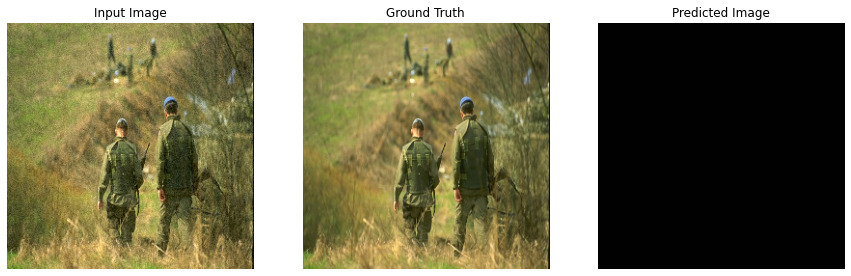

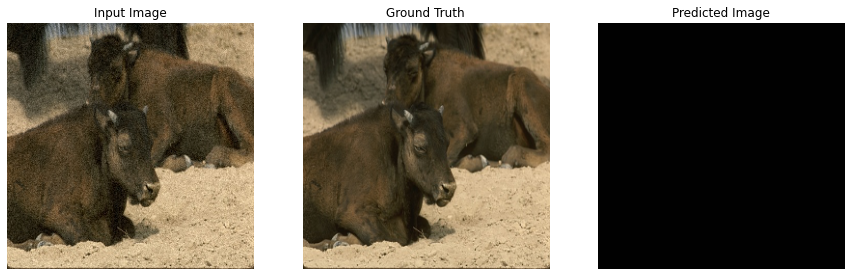

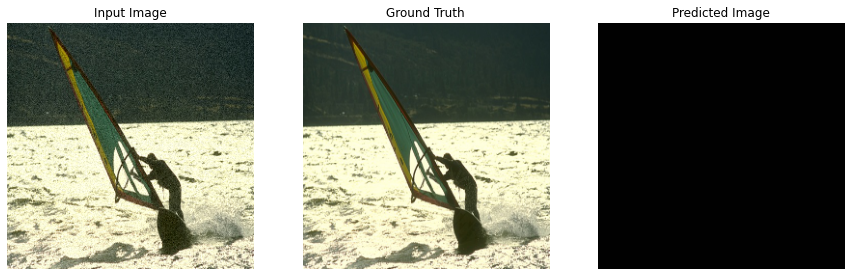

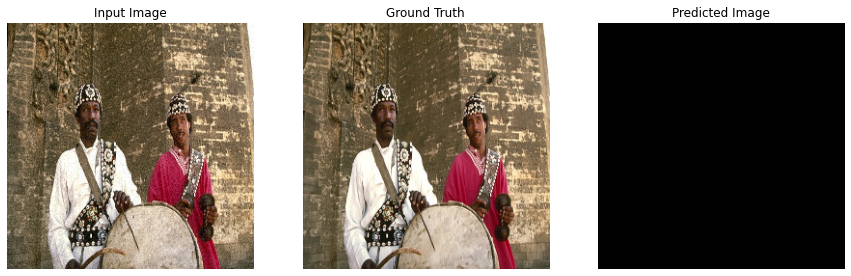

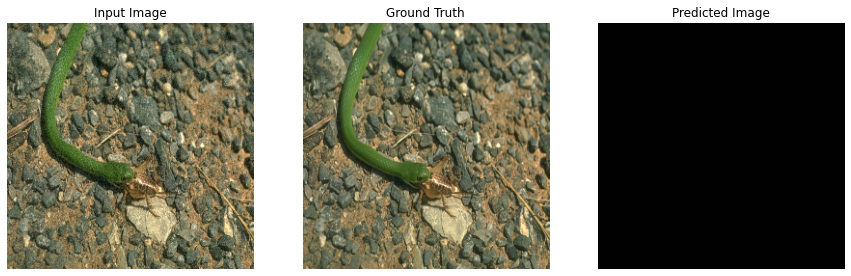

In [73]:
# Realizamos la predicción sobre el conjunto de testing
for inp, tar in test_dataset.take(5):
  generate_images(autoencoder, inp, tar)